# Mini Capstone Project: Crime Data Analysis with MySQL and Python





# Introduction:


In this capstone project, we will use Python, specifically the PyMySQL library, to interact with a MySQL database in order to analyze and gain insights from crime data. The dataset includes information such as DR NO, Date Reported, Date Occurred, Area Name, Crime Code, Crime Code Description, Victim Age, Victim Sex, Premises Description, Status, Location, Latitude, and Longitude.

# Objectives:
#  Database Setup and Import :

   - Create a MySQL database.
   - Load the provided crime dataset into the MySQL database.


In [1]:
# pip install mysql-connector-python
# pip install pymysql
# pip install cryptography
# pip install matplotlib seaborn

# Database Connection :

   - Use PyMySQL to establish a connection to the database in Jupyter Notebook (or Pycharm or VS code).
   - Verify the successful import of data in Jupyter Notebook.

In [2]:
import mysql.connector
import pandas as pd

# Establish the connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='123456',
    database='crime_data'
)

# Define the query
query = "SELECT * FROM crime_data;"

# Load data into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Display the DataFrame
df

# Close the connection
#connection.close()


C:\Users\Krishnapriya V\AppData\Local\Temp\ipykernel_2696\2964020708.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploration:

   - Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.
   - Identify the distinct crime codes and their descriptions.

In [4]:
# Get the total number of records
query="SELECT COUNT(*) as total_records FROM crime_data"
df=pd.read_sql(query,connection)
df

,total_records
0,499


In [5]:
# no of rows and col
query="SELECT * FROM crime_data"
df=pd.read_sql(query,connection)
df.shape

(499, 13)

In [6]:
# unique values in specific columns
query="SELECT DISTINCT Date_Rptd as DATE_REPORTED, DATE_OCC as DATE_OCCURENCE, Vict_Age as VICTIM_AGE FROM crime_data;"
df=pd.read_sql(query,connection)
df

,DATE_REPORTED,DATE_OCCURENCE,VICTIM_AGE
0,01-08-2020,01-08-2020,36
1,01-02-2020,01-01-2020,25
2,01-01-2020,01-01-2020,76
3,01-01-2020,01-01-2020,31
4,01-02-2020,01-02-2020,23
...,...,...,...
417,02-07-2020,02-07-2020,33
418,02-07-2020,02-07-2020,25
419,02-07-2020,02-07-2020,35
420,02-07-2020,01-10-2020,0


In [7]:
# Get distinct crime codes and their descriptions
query="SELECT DISTINCT Crm_Cd, Crm_Cd_Desc FROM crime_data;"
df=pd.read_sql(query,connection)
df

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


# Temporal Analysis:
   - Analyze the temporal aspects of the data.     
   - Determine trends in crime occurrence over time.
# observation:
<span style="text-decoration:underline;">MONTH WISE CRIME ANALYSIS:</span>
In this dataframe we can see that all the crimes occured in 2020 for each month. The following plot shows that crime frequency was highest in JANUARY(314) and FEBRUARY(130). Crime frequency was lowest  in JULY and AUGUST(only 4)



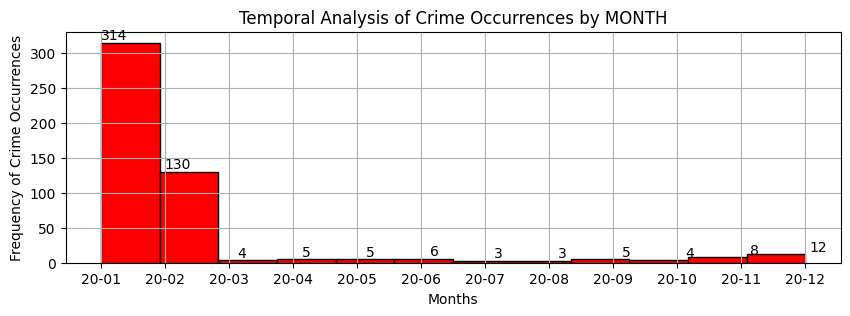

In [18]:
# Analyze the temporal aspects of the data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Write and execute SQL query to aggregate the data  by month
query = """
SELECT 
date_format(str_to_date(date_occ, '%m-%d-%y'), '%y-%m') as crm_month,
COUNT(*) as count

FROM crime_data
GROUP BY crm_month
ORDER BY crm_month;
"""
df= pd.read_sql(query, connection)


# Plot the temporal analysis
plt.figure(figsize=(10, 3))
plt.title('Temporal Analysis of Crime Occurrences by MONTH')
plt.hist(df['crm_month'],bins=12, weights=df['count'],edgecolor="black", facecolor="red")
plt.xlabel('Months')
plt.ylabel('Frequency of Crime Occurrences')
plt.grid()

# Annotate each bar with its count value
for i, count in enumerate(df['count']):
    plt.text(i + 0.2, count, str(count), ha='center', va='bottom')

plt.show()


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Spatial Analysis:

   - Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.
   - Visualize crime hotspots on a map.

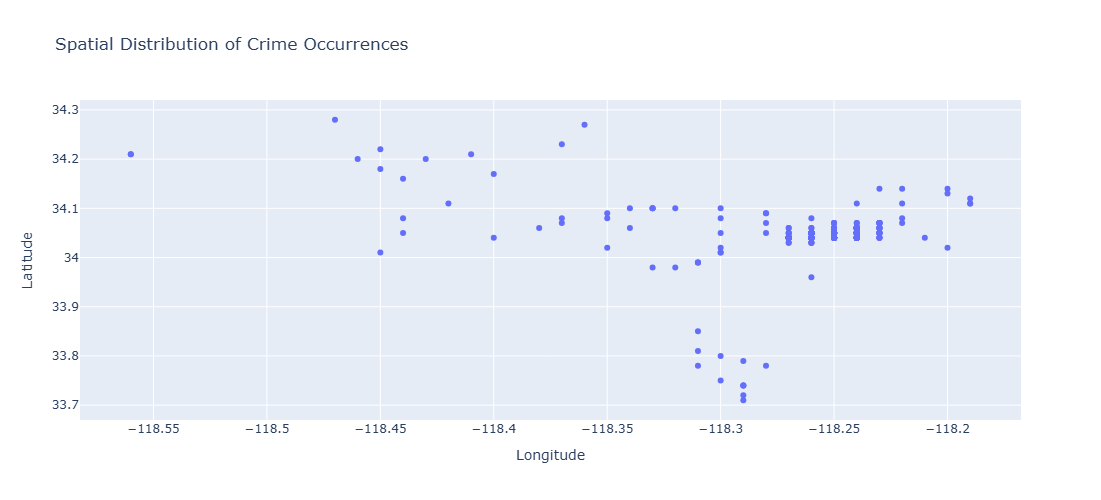

In [19]:
# Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.
import pandas as pd
import plotly.express as px


query = '''SELECT LAT, LON FROM crime_data;'''
df= pd.read_sql(query, connection)

fig=px.scatter(df, x='LON', y='LAT', title="Spatial Distribution of Crime Occurrences")

fig.update_layout(
    width=600,  # Set the width to 800 pixels
    height=500, # Set the height to 600 pixels
)
fig.update_xaxes(title_text="Longitude")  # Set x-axis label
fig.update_yaxes(title_text="Latitude")   # Set y-axis label

fig.show()

In [11]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Visualize crime hotspots on a map.
import folium
from folium.plugins import HeatMap
import pandas as pd
import plotly.express as px

query = """SELECT LAT, LON FROM crime_data;"""
df = pd.read_sql(query, connection)

# Create a Folium map centered at the mean latitude and longitude
map_center = [df['LAT'].mean(), df['LON'].mean()]
map1 = folium.Map(location=map_center, zoom_start=10, width='50%', height='60%')

# Add markers for each crime occurrence
for index, row in df.iterrows():
    folium.Marker([row['LAT'], row['LON']]).add_to(map1)
# Convert the DataFrame to a list of lists (required format for HeatMap)
crime_data = df[['LAT', 'LON']].values.tolist()

# Create a HeatMap overlay with the crime data
HeatMap(crime_data).add_to(map1)
# Display the map
map1


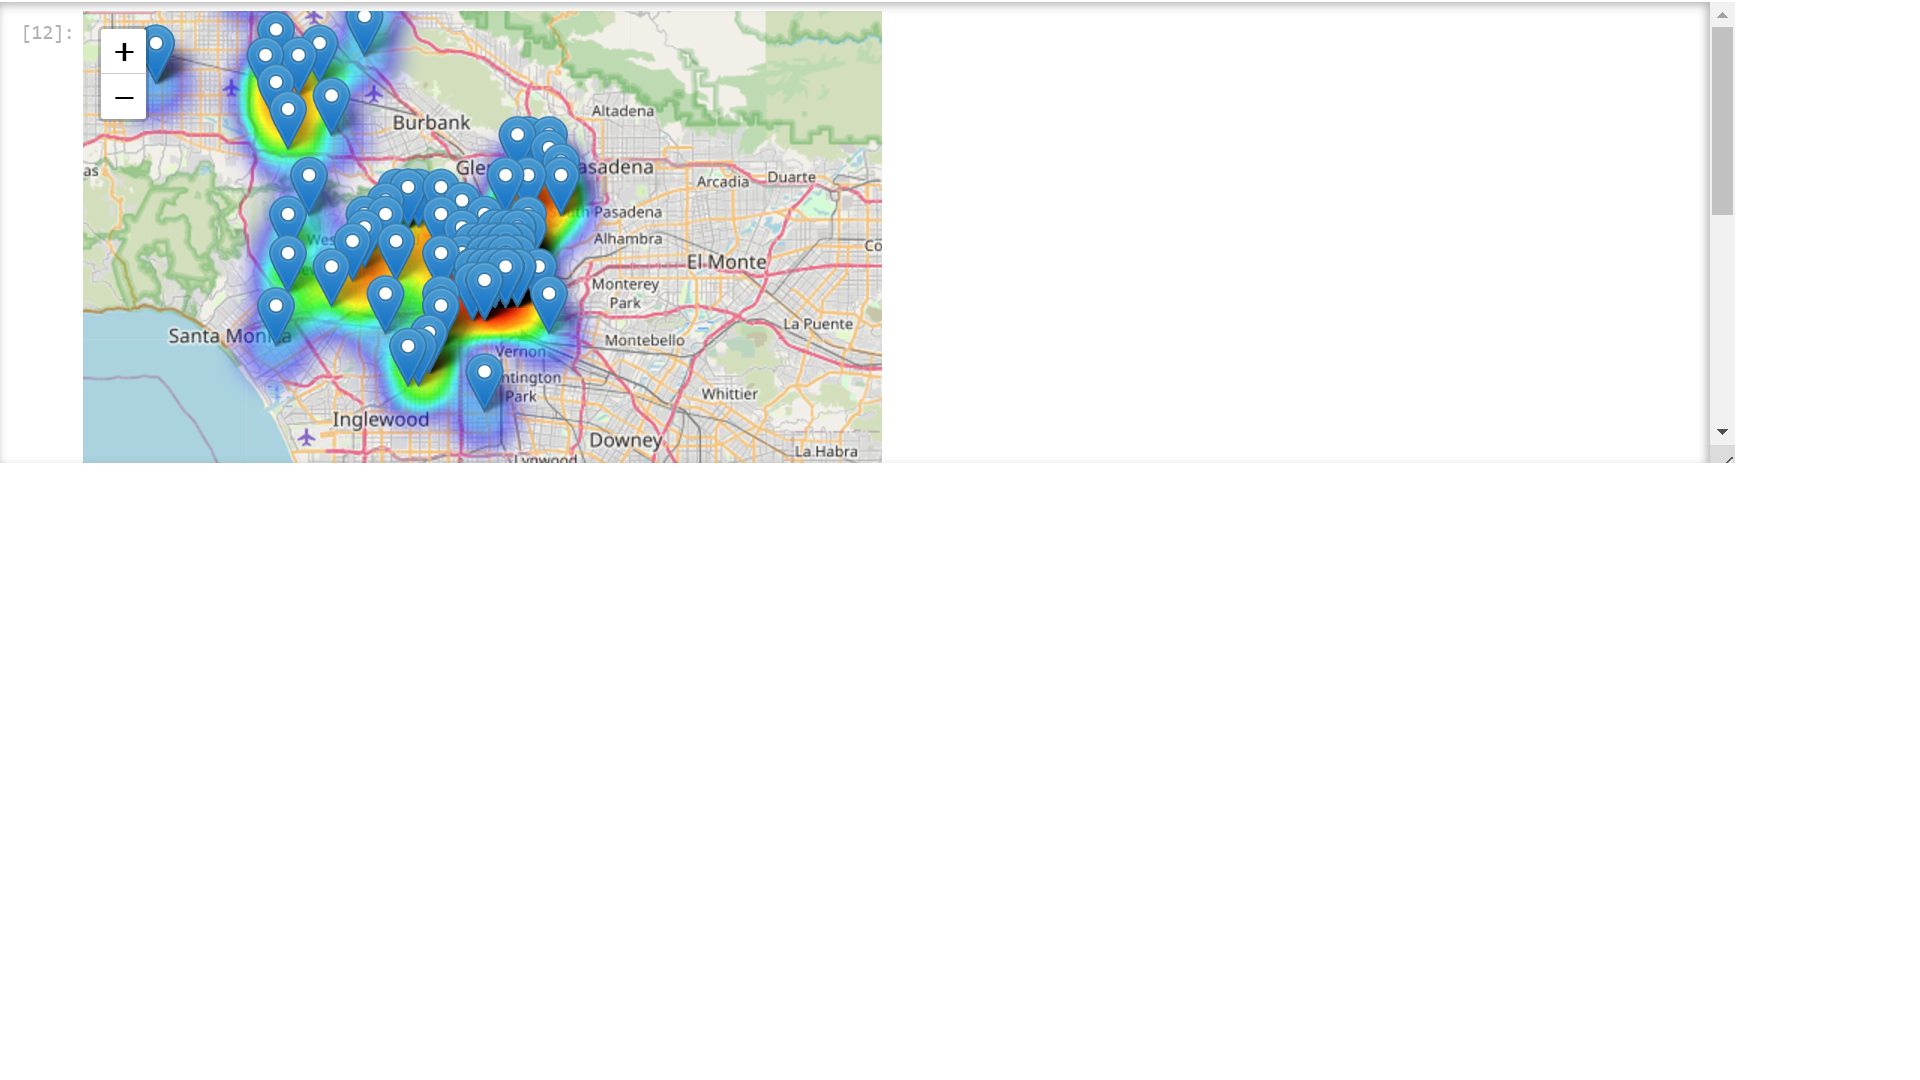

In [22]:
from IPython.display import Image
Image(filename=r'C:\Users\Krishnapriya V\Downloads\GINTU ODINSCHOOL STUDY MATERIAL\PYTHON\MINI-CAPSTONE PROJECT-Gintu Vedula(S9018)\map.png')

# observation:
<span style="text-decoration:underline;">CRIME SPATIAL ANALYSIS/ HOTSPOTS:</span>
  - We can see from spatial analysis that most of the crimes ocuured in the area with Latitude (34.5 to 34.6 )and Longitude ( -118.22 to -118.25) . 
  - Also the folium map shows most crime hotspots are in the area 'Los Angeles'

# Victim Demographics:

   - Investigate the distribution of victim ages and genders.
   - Identify common premises descriptions where crimes occur.

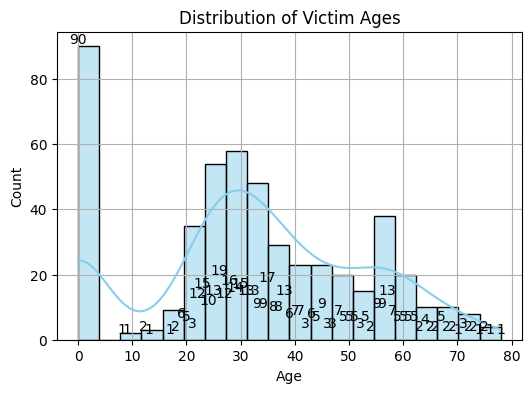

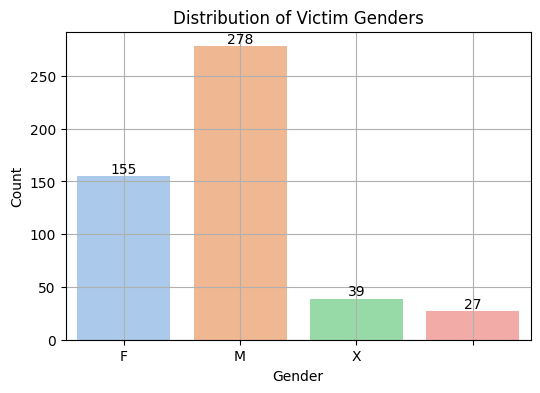

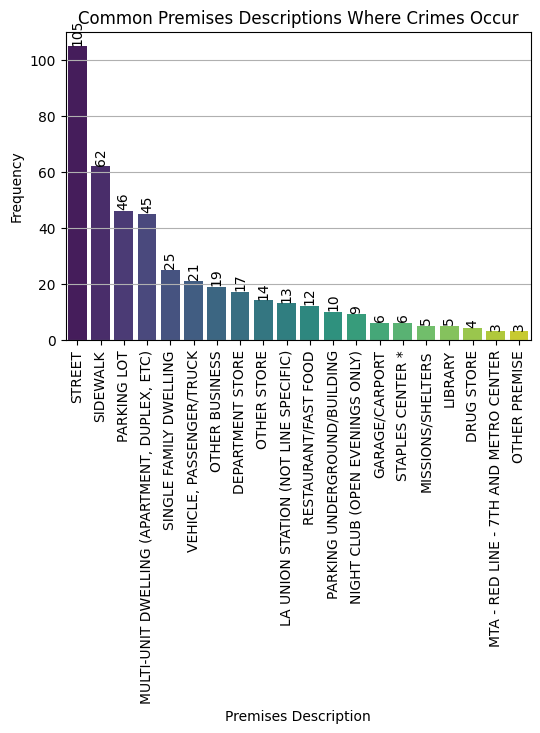

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


query = """SELECT Vict_Age, Vict_Sex, Premis_Desc FROM crime_data;"""
df = pd.read_sql(query, connection)

# Plot the distribution of victim ages
plt.figure(figsize=(6, 4))
sns.histplot(df['Vict_Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
# Annotate each bar with its count value
counts = df['Vict_Age'].value_counts()
for index, count in counts.items():
    plt.text(index, count, str(count), ha='center', va='bottom')
plt.show()



# Plot the distribution of victim genders
plt.figure(figsize=(6, 4))
sns.countplot(x='Vict_Sex', data=df, palette='pastel')
plt.title('Distribution of Victim Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
# Annotate each bar with its count value
counts = df['Vict_Sex'].value_counts()
for index, count in counts.items():
    plt.text(index, count , str(count), ha='center', va='bottom')
plt.show()

# Identify common premises
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:20], palette='viridis')
plt.title('Common Premises Descriptions Where Crimes Occur')
plt.xlabel('Premises Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
# Annotate each bar with its count value
counts = df['Premis_Desc'].value_counts()
for index, count in enumerate(counts[:20]):
    plt.text(index, count + 0.5, str(count), ha='center', va='bottom', rotation=90)

plt.show()


# Observation:
   - Victim ages: Highest for the age group - 0 to 5 years old  and count is almost 90. The next victim age group is >30 years old and >55 years old people.
   - Victim gender: Males are victimized more than females
   - Crime frequency by Premises: Higest record found (>100) in STREET premise(location)

# Status Analysis:
 - Examine the status of reported crimes.
 - Classify crimes based on their current status.

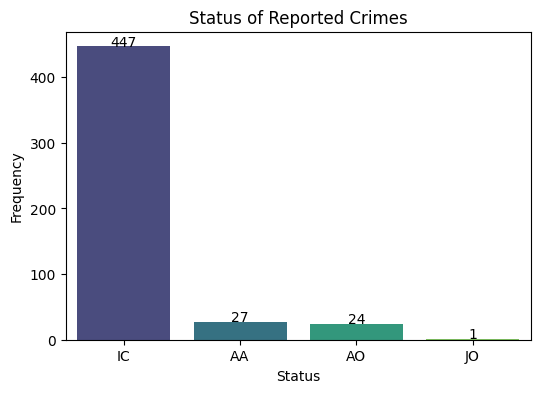

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT Status, COUNT(*) AS Frequency
FROM crime_data
GROUP BY Status
ORDER BY Frequency DESC;
"""
df = pd.read_sql(query, connection)

# Set up the plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Status', y='Frequency', data=df, palette='viridis')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Status of Reported Crimes')

# Annotate each bar with its frequency value
for index, row in df.iterrows():
    plt.text(index, row['Frequency'] + 0.5, str(row['Frequency']), ha='center')

plt.show()



- IC="Investigation Continued"
- AA="Administrative Action"
- AO="Arrest Occurred"
- JO="Judicial Order"

# Observation:
 - The status of maximum cases (count=447 )are still in IC("Investigation Continued"), only 1 case went for JO ("Judicial Order"). Administrative Action and Arrest Occured statuses are also not satisfactory. 

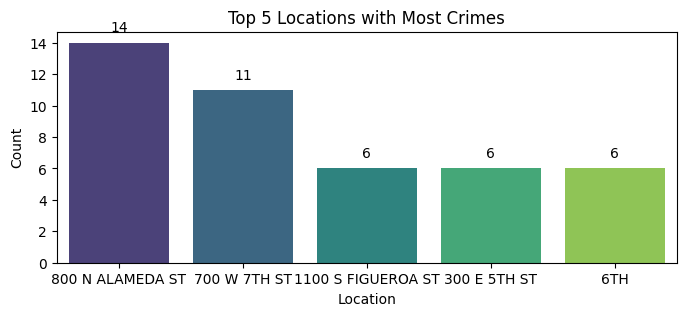

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your dataset with the 'Location' column
query = """
SELECT Location
FROM crime_data;
"""
df = pd.read_sql(query, connection)

# Get the top 5 locations based on crime counts
top_5_locations = df['Location'].value_counts().head(5)

# Plot the distribution of crimes for the top 5 locations
plt.figure(figsize=(8, 3))
sns.barplot(x=top_5_locations.index, y=top_5_locations.values, palette='viridis')
plt.title('Top 5 Locations with Most Crimes')
plt.ylabel('Count')
plt.xlabel('Location')

# Annotate each bar with its count value
for index, count in enumerate(top_5_locations.values):
    plt.text(index, count + 0.5, str(count), ha='center', va='bottom')

plt.show()


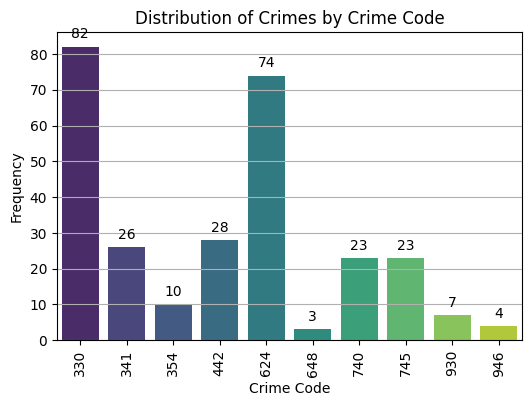

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT Crm_Cd, COUNT(*) AS Frequency
FROM crime_data
GROUP BY Crm_Cd;
"""
df = pd.read_sql(query, connection)

# Plot the distribution of crimes based on the 'Crm_Cd' column
plt.figure(figsize=(6, 4))
#sns.countplot(data=df, x='Crm_Cd', order=df['Crm_Cd'].value_counts().index[:10], palette='viridis')
ax=sns.barplot(data=df.head(10), x='Crm_Cd', y='Frequency', palette='viridis')
plt.title('Distribution of Crimes by Crime Code')
plt.ylabel('Frequency')
plt.xlabel('Crime Code')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Annotate each bar with its frequency value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()


# Conclusion:
- From the above analysis we can conclude that, The crime branch should deploy additional patrols and law enforcement personnel to hotspots to increase visibility and deterrence. Also conduct proactive investigations in hotspots to identify and apprehend offenders.